In [1]:
import pandas as pd
import numpy

In [2]:
import matplotlib.pyplot as plt

import matplotlib.cbook as cbook
import matplotlib.dates as mdates


## Порядок полей в файлах
### Идентификатор инструмента (FIGI)
### Дата и время начала свечи (UTC)
### Цена открытия (open)
### Цена закрытия (close)
### Максимальная цена за интервал (high)
### Минимальная цена за интервал (low)
### Объем в лотах (volume)

In [3]:
COLS_NAMES = ['figi', 'utc', 'open', 'close', 'high', 'low', 'volume']

In [5]:
!pwd

/home/max/Desktop/traiding_bot/invest-bot/research


In [4]:
df1 = pd.read_csv('./data/sber_2023/e6123145-9665-43e0-8413-cd61b8aa9b13_20230101.csv', sep=';', names=[i for i in range(8)], usecols=range(1,7))

In [5]:
df1.rename(columns={i:COLS_NAMES[i] for i in range(1,7)}, inplace=True)

In [6]:
df1['utc'] = pd.to_datetime(df1['utc'])

In [7]:
df1 = df1.set_index('utc')

In [8]:
df1.head(3)

,open,close,high,low,volume
utc,,,,,
2023-01-01 09:00:00+00:00,141.06,141.06,141.06,141.06,415
2023-01-01 09:01:00+00:00,140.62,140.84,141.26,139.98,864
2023-01-01 09:02:00+00:00,140.85,139.88,140.85,139.88,256


In [9]:
import os

df = df1[0:0].copy()

for file in os.listdir('./data/sber_2023/'):
    filename = os.fsdecode(file)
    df_tmp = pd.read_csv(f'./data/sber_2023/{filename}', sep=';', names=[i for i in range(8)], usecols=range(1,7))    
    df_tmp.rename(columns={i:COLS_NAMES[i] for i in range(1,7)}, inplace=True)    
    # df_tmp['utc'] = pd.to_datetime(df_tmp['utc'])
    # df_tmp = df_tmp.set_index('utc')
    
    df = pd.concat([df, df_tmp])
    
df = df.sort_values(by='utc')
df['utc'] = pd.to_datetime(df['utc'])
df = df.set_index('utc')
df.head(3)

,open,close,high,low,volume
utc,,,,,
2023-01-01 09:00:00+00:00,141.06,141.06,141.06,141.06,415
2023-01-01 09:01:00+00:00,140.62,140.84,141.26,139.98,864
2023-01-01 09:02:00+00:00,140.85,139.88,140.85,139.88,256


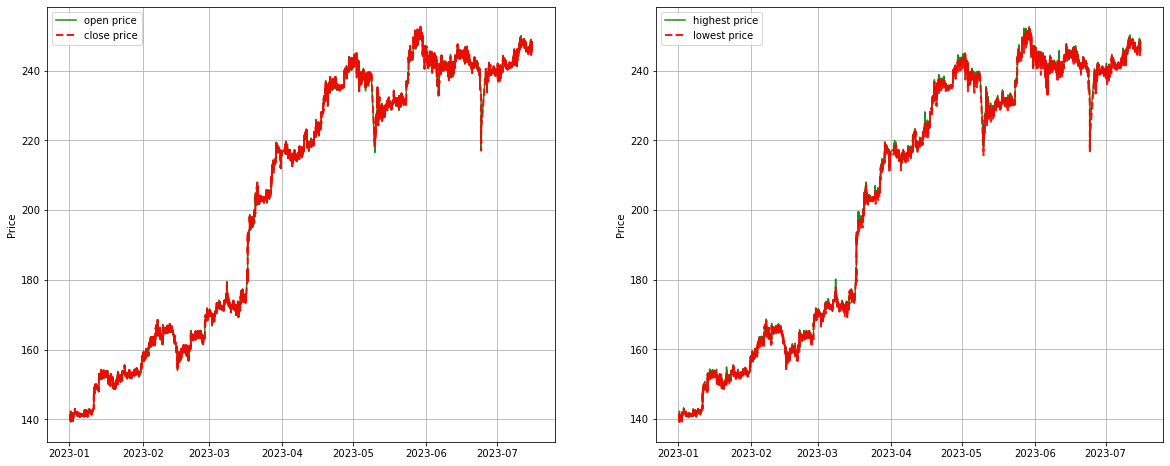

In [10]:
fig, axes = plt.subplots(1,2,figsize=(20,8))

axes[0].plot('open', 'g-', data=df, label='open price', alpha=0.9)
axes[0].plot('close', 'r--', data=df, label='close price', alpha=0.9, linewidth=2)

axes[1].plot('high', 'g-', data=df, label='highest price', alpha=0.9)
axes[1].plot('low', 'r--', data=df, label='lowest price', alpha=0.9, linewidth=2)

for ax in axes:
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    # ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))
    ax.grid(True)
    ax.legend()
    ax.set_ylabel(r'Price')

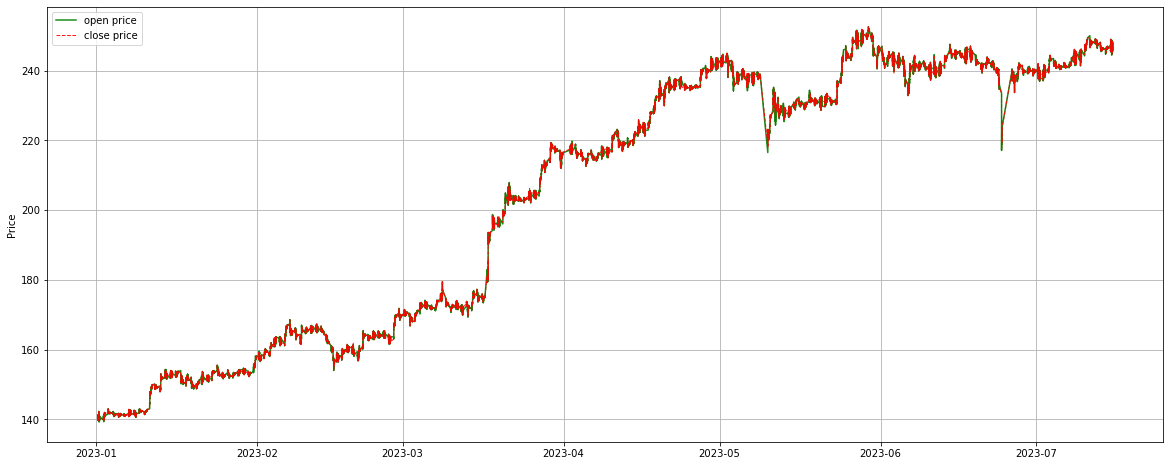

In [13]:
fig, axes = plt.subplots(1,1,figsize=(20,8))

axes.plot('open', 'g-', data=df, label='open price', alpha=0.9)
axes.plot('close', 'r--', data=df, label='close price', alpha=0.9, linewidth=1)
axes.xaxis.set_major_locator(mdates.AutoDateLocator())
# axes.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.AutoDateLocator())
axes.grid(True)
axes.legend()
axes.set_ylabel(r'Price')
plt.show();

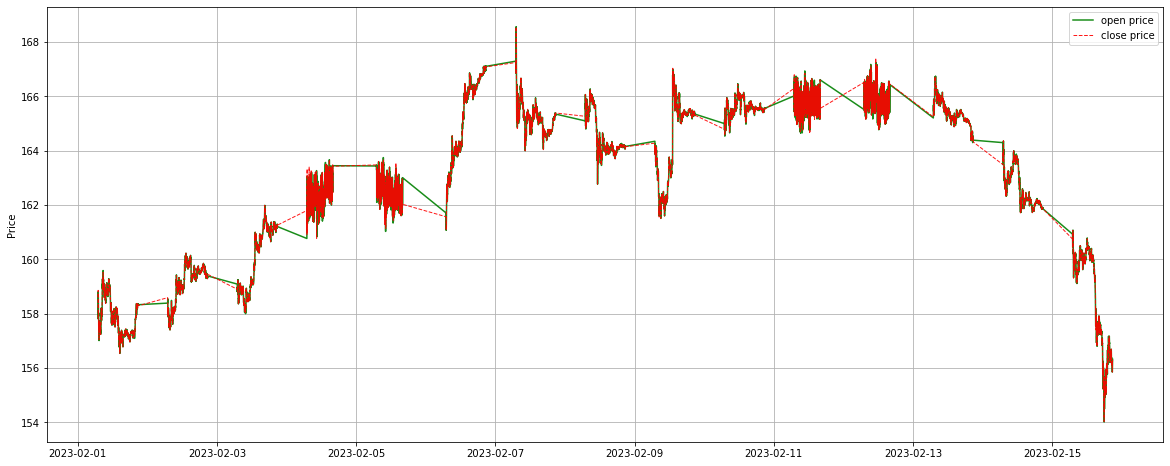

In [14]:
fig, axes = plt.subplots(1,1,figsize=(20,8))

axes.plot('open', 'g-', data=df['2023-02-01':'2023-02-15'], label='open price', alpha=0.9)
axes.plot('close', 'r--', data=df['2023-02-01':'2023-02-15'], label='close price', alpha=0.9, linewidth=1)
axes.xaxis.set_major_locator(mdates.AutoDateLocator())
# axes.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.AutoDateLocator())
axes.grid(True)
axes.legend()
axes.set_ylabel(r'Price')
plt.show();

In [11]:
import holidays
ru_holidays = holidays.RUS()


df = df[df.index > '2023-01-10']
df = df[df.index.dayofweek < 5]
df = df[~df.index.isin(ru_holidays.keys())]

In [12]:
df = df[(df.index.hour >= 7) & (df.index.hour < 15)]

In [13]:
df

,open,close,high,low,volume
utc,,,,,
2023-01-10 07:00:00+00:00,142.10,142.10,142.19,141.90,44426
2023-01-10 07:01:00+00:00,142.08,142.13,142.13,141.90,20892
2023-01-10 07:02:00+00:00,142.12,142.00,142.12,141.99,7816
2023-01-10 07:03:00+00:00,142.00,141.94,142.04,141.85,26014
2023-01-10 07:04:00+00:00,141.93,141.93,141.96,141.87,12921
...,...,...,...,...,...
2023-07-14 14:55:00+00:00,246.45,246.45,246.47,246.42,1672
2023-07-14 14:56:00+00:00,246.45,246.45,246.47,246.41,2431
2023-07-14 14:57:00+00:00,246.47,246.47,246.47,246.35,5888


In [14]:
63810 / (8 * 60)

132.9375

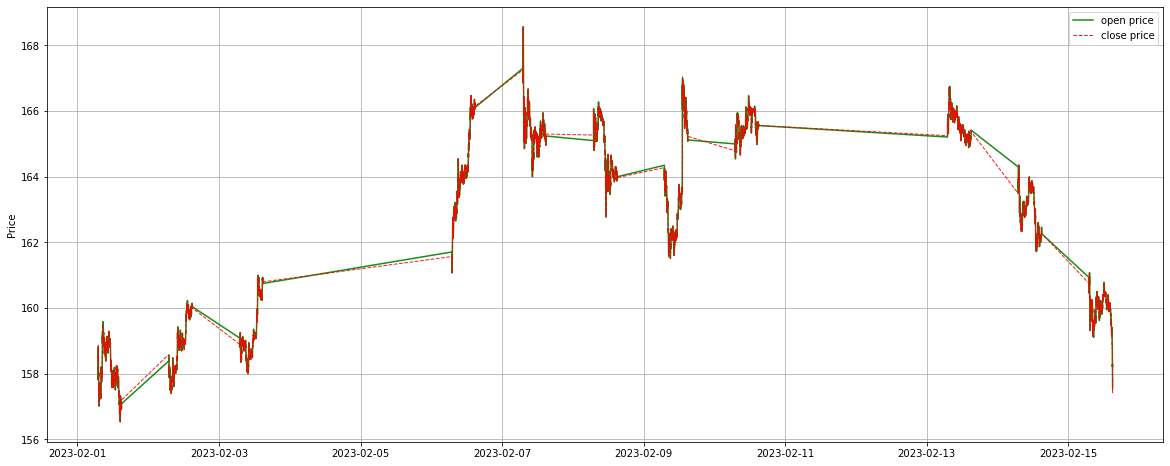

In [15]:
fig, axes = plt.subplots(1,1,figsize=(20,8))

axes.plot('open', 'g-', data=df['2023-02-01':'2023-02-15'], label='open price', alpha=0.9)
axes.plot('close', 'r--', data=df['2023-02-01':'2023-02-15'], label='close price', alpha=0.9, linewidth=1)
axes.xaxis.set_major_locator(mdates.AutoDateLocator())
# axes.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.AutoDateLocator())
axes.grid(True)
axes.legend()
axes.set_ylabel(r'Price')
plt.show();

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from math import sqrt


In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import torch

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

In [32]:
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 300
TARGET_NAME = 'close'

task = Task('reg', metric='mse')
roles = {
    'target': TARGET_NAME,
    # 'datetime': ['utc']
}

In [33]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [89]:
len(df)/60

1063.5

In [20]:
tscv = TimeSeriesSplit(n_splits=2, test_size=150)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63810 entries, 2023-01-10 07:00:00+00:00 to 2023-07-14 14:59:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    63810 non-null  float64
 1   close   63810 non-null  float64
 2   high    63810 non-null  float64
 3   low     63810 non-null  float64
 4   volume  63810 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 5.4 MB


In [25]:
df.resample('H').agg({'close': 'last', 'volume': 'sum'})

,close,volume
utc,,
2023-01-10 07:00:00+00:00,141.70,694353
2023-01-10 08:00:00+00:00,141.67,209599
2023-01-10 09:00:00+00:00,141.76,168228
2023-01-10 10:00:00+00:00,142.19,245186
2023-01-10 11:00:00+00:00,142.15,129838
...,...,...
2023-07-14 10:00:00+00:00,246.20,342314
2023-07-14 11:00:00+00:00,246.44,109229
2023-07-14 12:00:00+00:00,246.20,262119


In [37]:
tmp = df.resample('H').agg({'close': 'last', 'volume': 'sum'}).dropna().reset_index()[['close', 'volume']]
# tmp['utc'] = tmp['utc'].dt.tz_convert(None)
print(tmp.head())

for size in range(5,16,5):
# window_size = 10
    tmp[f'MA{size}'] = tmp['close'].rolling(window=size).mean()
    tmp[f'EMA{size}'] = tmp['close'].ewm(span=size, adjust=False).mean()
    tmp[f'StdDev{size}'] = tmp['close'].rolling(window=size).std()
    tmp[f'UpperBB{size}'] = tmp[f'MA{size}'] + (2 * tmp[f'StdDev{size}'])
    tmp[f'LowerBB{size}'] = tmp[f'MA{size}'] - (2 * tmp[f'StdDev{size}'])


tmp['close'] = tmp['close'].shift(-1)
# tmp['volume'] = tmp['volume'].shift(-1)
tmp.dropna(subset=['close'], inplace=True)
# tmp.dropna(subset=['volume'], inplace=True)

tmp = tmp.fillna(method='bfill')


    close  volume
0  141.70  694353
1  141.67  209599
2  141.76  168228
3  142.19  245186
4  142.15  129838


In [27]:
tmp = tmp.loc[:, ~tmp.columns.str.contains('Std')]

In [38]:
tmp.head(3)

,close,volume,MA5,EMA5,StdDev5,UpperBB5,LowerBB5,MA10,EMA10,StdDev10,UpperBB10,LowerBB10,MA15,EMA15,StdDev15,UpperBB15,LowerBB15
0,141.67,694353,141.894,141.700000,0.254421,142.402842,141.385158,142.837,141.700000,1.760221,146.357443,139.316557,144.496,141.700000,2.83034,150.15668,138.83532
1,141.76,209599,141.894,141.690000,0.254421,142.402842,141.385158,142.837,141.694545,1.760221,146.357443,139.316557,144.496,141.696250,2.83034,150.15668,138.83532
2,142.19,168228,141.894,141.713333,0.254421,142.402842,141.385158,142.837,141.706446,1.760221,146.357443,139.316557,144.496,141.704219,2.83034,150.15668,138.83532


In [169]:
tmp = df.resample('H').mean().dropna().reset_index()[[ 'close', 'volume']]
# tmp['utc'] = tmp['utc'].dt.tz_convert(None)
print(tmp.head())

window_size = 10
tmp['MA'] = tmp['close'].rolling(window=window_size).mean()
tmp['ROC'] = tmp['close'].pct_change()
tmp['Volatility'] = tmp['close'].pct_change().std()
tmp['EMA'] = tmp['close'].ewm(span=10, adjust=False).mean()
tmp['StdDev'] = tmp['close'].rolling(window=window_size).std()
tmp['UpperBB'] = tmp['MA'] + (2 * tmp['StdDev'])
tmp['LowerBB'] = tmp['MA'] - (2 * tmp['StdDev'])
tmp['VolumeChange'] = tmp['volume'].pct_change()
tmp['Momentum'] = tmp['close'].pct_change(periods=window_size)

delta = tmp['close'].diff()
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
avg_gain = up.rolling(window=window_size).mean()
avg_loss = abs(down.rolling(window=window_size).mean())
rs = avg_gain / avg_loss
tmp['RSI'] = 100 - (100 / (1 + rs))

tmp['close'] = tmp['close'].shift(-1)
# tmp['volume'] = tmp['volume'].shift(-1)
tmp.dropna(subset=['close'], inplace=True)
# tmp.dropna(subset=['volume'], inplace=True)

tmp = tmp.fillna(method='bfill')


        close        volume
0  141.739500  11572.550000
1  141.565500   3493.316667
2  141.773500   2803.800000
3  141.992167   4086.433333
4  142.190333   2163.966667


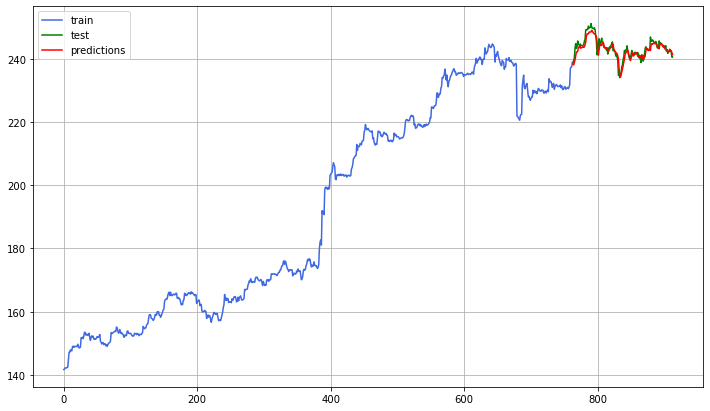

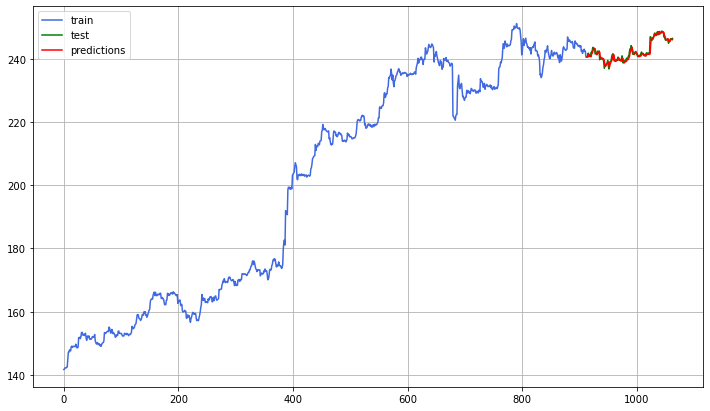

Overall RMSE: 1.14


In [39]:
# import time

rmse_values = []
for train_index, test_index in tscv.split(tmp):
   # tmp_df = tmp.reset_index().rename(columns={'index':'num'})
   train, test = tmp.iloc[train_index], tmp.iloc[test_index]
   
   # print(train)
   automl = TabularAutoML(
    task = task,
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'random_state': RANDOM_STATE},
   )

   out_of_fold_predictions = automl.fit_predict(train, roles=roles, verbose = 0)
   test_predictions = automl.predict(test)


   rmse = round(sqrt(mean_squared_error(test['close'], test_predictions.data[:, 0])), 2)
   rmse_values.append(rmse)

   fig, axes = plt.subplots(1,1,figsize=(12,7))
   axes.plot(train.index, train['close'], color='royalblue', label='train')
   # axes[1].plot(train.index, train['close'], color='royalblue', label='train')
   axes.plot(test.index, test['close'], color='green', label='test')
   axes.plot(test.index, test_predictions.data[:, 0], color='red', label='predictions')
   plt.grid(True)
   plt.legend()
   plt.show();


overall_rmse = round(np.mean(rmse_values), 2)
print("Overall RMSE:", overall_rmse)


In [151]:
overall_rmse = round(np.mean(rmse_values), 2)
print("Overall RMSE:", overall_rmse)

Overall RMSE: 1.31


In [132]:
!pwd

/home/max/Desktop/traiding_bot/invest-bot/research


In [133]:
import joblib

joblib.dump(automl, './automl_model_v1.pkl')

['./automl_model_v1.pkl']

In [134]:
model = joblib.load('./automl_model_v1.pkl')

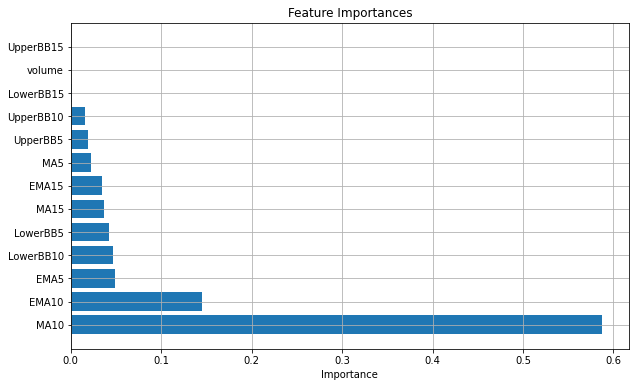

In [36]:
fi = automl.get_feature_scores()

fi = fi.sort_values(by='Importance', ascending=False)
# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.barh(fi.Feature, fi.Importance / fi.Importance.sum())
plt.xlabel('Importance')
plt.grid(True)
plt.title('Feature Importances')
plt.show()

In [157]:
fi

,Feature,Importance
0,MA,1.911462e+07
1,EMA,1.612641e+07
2,LowerBB,4.160785e+06
3,UpperBB,2.805117e+06
4,RSI,3.125210e+04
5,Momentum,1.597049e+04
6,ROC,1.382710e+04
7,StdDev,1.352081e+04
8,volume,1.172528e+04
9,VolumeChange,2.876396e+03


In [175]:
model.collect_used_feats()

['utc',
 'volume',
 'MA',
 'VolumeChange',
 'ROC',
 'StdDev',
 'RSI',
 'Momentum',
 'LowerBB',
 'EMA',
 'UpperBB']